In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
np.random.seed(123)

In [2]:
train_raw = pd.read_csv('data/train_V2.csv')
test_raw = pd.read_csv('data/test_V2.csv')

# 1. Basic Statistics

In [3]:
print("training set size: {}, testing set size: {}, feature size: {}".format(train_raw.values.shape[0],test_raw.values.shape[0],test_raw.values.shape[1]))

training set size: 4446966, testing set size: 1934174, feature size: 28


#### Feature labels

In [4]:
list(test_raw)

['Id',
 'groupId',
 'matchId',
 'assists',
 'boosts',
 'damageDealt',
 'DBNOs',
 'headshotKills',
 'heals',
 'killPlace',
 'killPoints',
 'kills',
 'killStreaks',
 'longestKill',
 'matchDuration',
 'matchType',
 'maxPlace',
 'numGroups',
 'rankPoints',
 'revives',
 'rideDistance',
 'roadKills',
 'swimDistance',
 'teamKills',
 'vehicleDestroys',
 'walkDistance',
 'weaponsAcquired',
 'winPoints']

#### Win place percentage (the probability of winning)

In [5]:
wpp_count,wpp_div = np.histogram(train_raw['winPlacePerc']*100,bins=101,range=(0, 101))
print(list(zip(wpp_div,wpp_count)))

[(0.0, 220505), (1.0, 7808), (2.0, 37815), (3.0, 101079), (4.0, 53222), (5.0, 8312), (6.0, 52929), (7.0, 80184), (8.0, 48119), (9.0, 11873), (10.0, 66548), (11.0, 59998), (12.0, 40639), (13.0, 33082), (14.0, 71118), (15.0, 38212), (16.0, 36804), (17.0, 52973), (18.0, 46126), (19.0, 39758), (20.0, 50448), (21.0, 40382), (22.0, 47821), (23.0, 43910), (24.0, 30917), (25.0, 71192), (26.0, 42665), (27.0, 34115), (28.0, 46096), (29.0, 50217), (30.0, 39652), (31.0, 36195), (32.0, 43511), (33.0, 45071), (34.0, 52322), (35.0, 36749), (36.0, 36209), (37.0, 50948), (38.0, 37829), (39.0, 36088), (40.0, 55463), (41.0, 32607), (42.0, 53076), (43.0, 25318), (44.0, 56335), (45.0, 24962), (46.0, 55892), (47.0, 21872), (48.0, 56479), (49.0, 3635), (50.0, 58695), (51.0, 48149), (52.0, 29186), (53.0, 54335), (54.0, 23832), (55.0, 46632), (56.0, 31524), (57.0, 49756), (58.0, 30086), (59.0, 35827), (60.0, 48610), (61.0, 34937), (62.0, 46401), (63.0, 25429), (64.0, 40660), (65.0, 47637), (66.0, 40568), (67.0

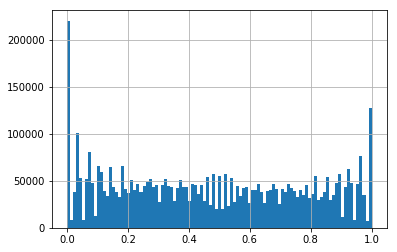

In [6]:
hist_wpp = train_raw['winPlacePerc'].hist(bins=101)

#### Kills (number of kills in one game)

In [7]:
kill_count,kill_div = np.histogram(train_raw['kills'],bins=train_raw['kills'].max()-train_raw['kills'].min())
print(list(zip(kill_div,kill_count)))

[(0.0, 2529722), (1.0, 928079), (2.0, 472466), (3.0, 232441), (4.0, 124543), (5.0, 66577), (6.0, 37960), (7.0, 21816), (8.0, 12779), (9.0, 7644), (10.0, 4599), (11.0, 2799), (12.0, 1755), (13.0, 1137), (14.0, 757), (15.0, 484), (16.0, 325), (17.0, 234), (18.0, 165), (19.0, 112), (20.0, 109), (21.0, 70), (22.0, 77), (23.0, 47), (24.0, 44), (25.0, 27), (26.0, 27), (27.0, 21), (28.0, 22), (29.0, 13), (30.0, 13), (31.0, 13), (32.0, 4), (33.0, 12), (34.0, 5), (35.0, 7), (36.0, 8), (37.0, 5), (38.0, 7), (39.0, 4), (40.0, 4), (41.0, 5), (42.0, 3), (43.0, 3), (44.0, 2), (45.0, 1), (46.0, 2), (47.0, 1), (48.0, 1), (49.0, 1), (50.0, 1), (51.0, 0), (52.0, 0), (53.0, 4), (54.0, 0), (55.0, 2), (56.0, 2), (57.0, 2), (58.0, 0), (59.0, 0), (60.0, 0), (61.0, 0), (62.0, 0), (63.0, 0), (64.0, 0), (65.0, 1), (66.0, 1), (67.0, 0), (68.0, 0), (69.0, 0), (70.0, 0), (71.0, 1)]


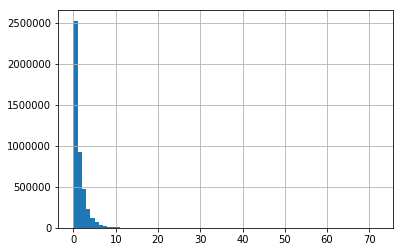

In [8]:
hist_kills = train_raw['kills'].hist(bins=train_raw['kills'].max()-train_raw['kills'].min())

#### Assists (number of helping team member kills in one game)

In [9]:
assist_count,assist_div = np.histogram(train_raw['assists'],bins=train_raw['assists'].max()-train_raw['assists'].min())
print(list(zip(assist_div,assist_count)))

[(0.0, 3667660), (1.0, 591883), (2.0, 137144), (3.0, 35640), (4.0, 9990), (5.0, 2892), (6.0, 976), (7.0, 387), (8.0, 185), (9.0, 84), (10.0, 48), (11.0, 27), (12.0, 20), (13.0, 16), (14.0, 2), (15.0, 7), (16.0, 0), (17.0, 2), (18.0, 0), (19.0, 0), (20.0, 1), (21.0, 2)]


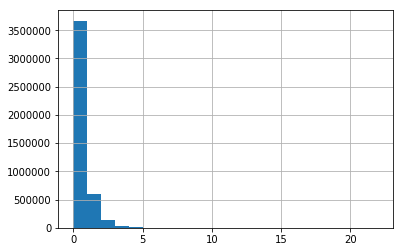

In [10]:
hist_assist = train_raw['assists'].hist(bins=train_raw['assists'].max()-train_raw['assists'].min())

#### DBNOs (number of knocking down ememies)

In [11]:
DBNOs_count,DBNOs_div = np.histogram(train_raw['DBNOs'],bins=train_raw['DBNOs'].max()-train_raw['DBNOs'].min())
print(list(zip(DBNOs_div,DBNOs_count)))

[(0.0, 2773735), (1.0, 983281), (2.0, 395119), (3.0, 162682), (4.0, 69307), (5.0, 31686), (6.0, 14977), (7.0, 7291), (8.0, 3694), (9.0, 1966), (10.0, 1110), (11.0, 643), (12.0, 466), (13.0, 275), (14.0, 177), (15.0, 137), (16.0, 87), (17.0, 80), (18.0, 64), (19.0, 34), (20.0, 30), (21.0, 26), (22.0, 18), (23.0, 14), (24.0, 10), (25.0, 16), (26.0, 11), (27.0, 6), (28.0, 3), (29.0, 1), (30.0, 1), (31.0, 3), (32.0, 3), (33.0, 7), (34.0, 0), (35.0, 1), (36.0, 0), (37.0, 0), (38.0, 1), (39.0, 2), (40.0, 1), (41.0, 0), (42.0, 0), (43.0, 0), (44.0, 0), (45.0, 0), (46.0, 0), (47.0, 0), (48.0, 0), (49.0, 0), (50.0, 0), (51.0, 0), (52.0, 1)]


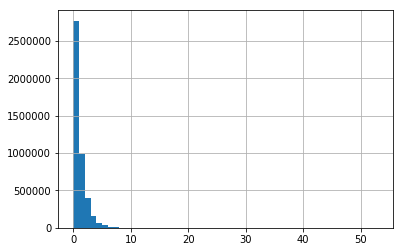

In [12]:
hist_DBNOs = train_raw['DBNOs'].hist(bins=train_raw['DBNOs'].max()-train_raw['DBNOs'].min())

#### Info of different matchTypes

In [13]:
group_names = train_raw['matchType'].unique()
groups = train_raw.groupby(by='matchType')
squadfpp_gp = groups.get_group('squad-fpp')
duo_gp = groups.get_group('duo')
solofpp_gp = groups.get_group('solo-fpp')
squad_gp = groups.get_group('squad')
duofpp_gp = groups.get_group('duo-fpp')
normalsquadfpp_gp = groups.get_group('normal-squad-fpp')
solo_gp = groups.get_group('solo')
crashfpp_gp = groups.get_group('crashfpp')
flaretpp_gp = groups.get_group('flaretpp')
normalsolofpp_gp = groups.get_group('normal-solo-fpp')
flarefpp_gp = groups.get_group('flarefpp')
normalduofpp_gp = groups.get_group('normal-duo-fpp')
normalduo_gp = groups.get_group('normal-duo')
normalsquad_gp = groups.get_group('normal-squad')
crashtpp_gp = groups.get_group('crashtpp')
normalsolo_gp = groups.get_group('normal-solo')
print("Group by matchType:")
for name in group_names:
    tmp_df = groups.get_group(name)
    print("size of {}: {}".format(name, tmp_df.values.shape[0]))
match_types={}
match_types['squad-fpp']=squadfpp_gp
match_types['duo']=duo_gp
match_types['solo-fpp']=solofpp_gp
match_types['squad']=squad_gp
match_types['duo-fpp']=duofpp_gp
match_types['normal-squad-fpp']=normalsquadfpp_gp
match_types['solo']=solo_gp
match_types['crashfpp']=crashfpp_gp
match_types['flaretpp']=flaretpp_gp
match_types['normal-solo-fpp']=normalsolofpp_gp
match_types['flarefpp']=flarefpp_gp
match_types['normal-duo-fpp']=normalduofpp_gp
match_types['normal-duo']=normalduo_gp
match_types['normal-squad']=normalsquad_gp
match_types['crashtpp']=crashtpp_gp
match_types['normal-solo']=normalsolo_gp

Group by matchType:
size of squad-fpp: 1756186
size of duo: 313591
size of solo-fpp: 536762
size of squad: 626526
size of duo-fpp: 996691
size of solo: 181943
size of normal-squad-fpp: 17174
size of crashfpp: 6287
size of flaretpp: 2505
size of normal-solo-fpp: 1682
size of flarefpp: 718
size of normal-duo-fpp: 5489
size of normal-duo: 199
size of normal-squad: 516
size of crashtpp: 371
size of normal-solo: 326


# 2. Feature Selection

calculate the correlation matrix between features, and remove the features that correlation greater than 0.9 and less than -0.9

In [14]:
features = list(train_raw)
features.remove('matchType')
features=features[3:-1]
train = train_raw[features]
corr = train.corr()

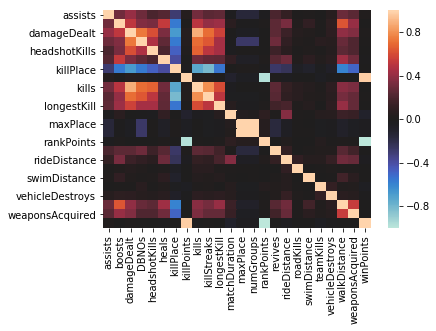

In [15]:
f=sns.heatmap(corr,center=0,vmin=-1,vmax=1)

In [16]:
colums_used=[True]*len(features)
for i in range(corr.shape[0]):
    for j in range(i+1,corr.shape[0]):
        if corr.iloc[i][j]>=0.9 or corr.iloc[i,j]<-0.9:
            if colums_used[j]:
                colums_used[j]=False
                
colums_used.insert(12,True) # add back match type
colums_used=[True,True,True]+colums_used+[True]
selected=train_raw.columns[np.array(colums_used)]
print('selected :',selected)
print('removed :',train_raw.columns[np.array([(not t) for t in colums_used])])
train=train_raw[selected]
test=test_raw[test_raw.columns[np.array(colums_used[:-1])]]

selected : Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPlacePerc'],
      dtype='object')
removed : Index(['numGroups', 'rankPoints', 'winPoints'], dtype='object')


# 3. Group by matchType

In PUBG, there are different type of games(SOLOs,DUOs,SQUADs), and they should be considered separately.